#  $\color{blue}{\huge\bf\mathcal{Despliegue\ Docker -\ Python:}}$

Docker es una plataforma que permite **crear, ejecutar y distribuir aplicaciones** dentro de contenedores.  
Un **contenedor** es un entorno aislado que contiene todo lo necesario para ejecutar una aplicación: código, librerías, sistema de archivos, configuraciones, etc.

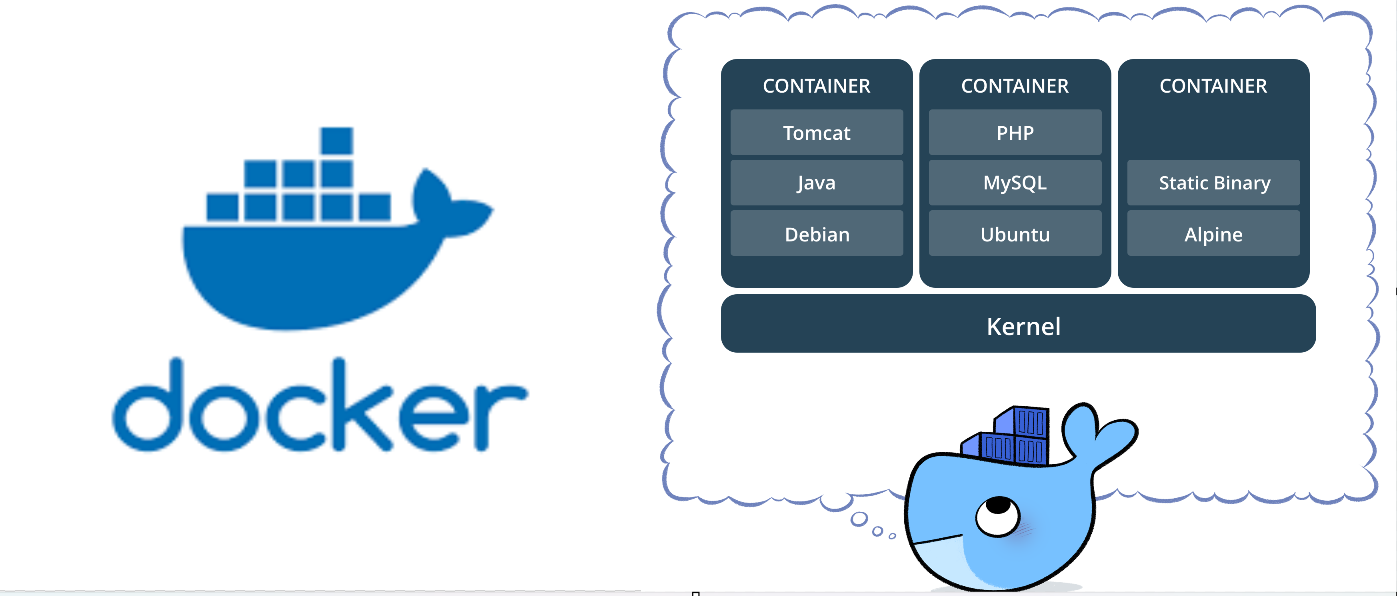

##  ¿Qué es un contenedor?

Un contenedor es como una mini computadora dentro de tu computadora:

- Tiene su propio sistema de archivos.
- Sus propias dependencias (por ejemplo, versiones específicas de Python, librerías, etc.).
- Se ejecuta de forma **aislada** del sistema operativo host.
- Es **ligero y rápido**, más que una máquina virtual.

##  ¿Para qué sirve Docker?

Con Docker puedes:

- Empaquetar tu app con todas sus dependencias.
- Ejecutarla en cualquier sistema operativo.
- Evitar errores por versiones de librerías o configuraciones distintas.

##  ¿Cómo funciona Docker?

1. Escribes un `Dockerfile` con instrucciones para instalar dependencias y correr tu app.
2. Docker **construye una imagen** con eso.
3. Docker ejecuta esa imagen en un **contenedor** aislado.

#  Flujo de trabajo con Docker

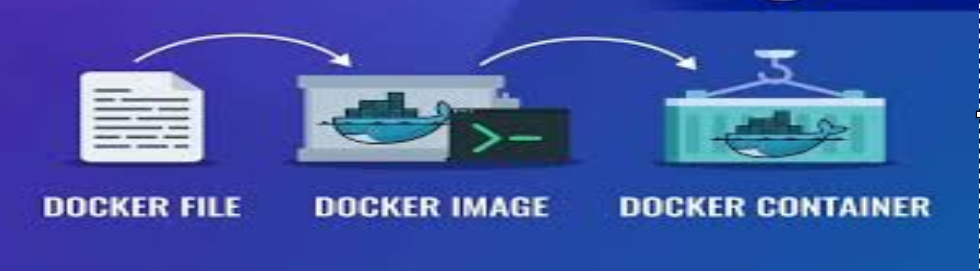


##  1. Dockerfile

El **Dockerfile** es el archivo fuente donde se escriben todas las instrucciones necesarias para construir el entorno de tu aplicación.

Incluye comandos como:

- `FROM`: define la imagen base.
- `COPY`: copia archivos al contenedor.
- `RUN`: ejecuta comandos (instalar dependencias, por ejemplo).
- `CMD`: define el comando por defecto al ejecutar el contenedor.

**Es como un manual de construcción de tu app**.

##  2. Docker Image

Una vez que tienes el Dockerfile, ejecutas desde tu terminal:

`docker build -t mi-app .`


##  Componentes Clave

| Componente      | Descripción |
|------------------|-------------|
| **Imagen (Image)**       | Es el molde que contiene el sistema, tu código y librerías. |
| **Contenedor (Container)** | Es una instancia en ejecución de una imagen. |
| **Dockerfile**   | Archivo donde defines los pasos para construir una imagen. |
| **Docker Hub**   | Repositorio donde puedes subir y compartir imágenes. |


#  Instalación de Docker en tu computador


##  Windows 10/11

**Paso 1: Verifica requisitos**

- Sistema operativo: Windows 10 o 11 (64 bits)
- Virtualización habilitada (puedes verificarlo en el Administrador de tareas → pestaña "Rendimiento")

**Paso 2: Descarga Docker Desktop**

 Ve a: https://www.docker.com/products/docker-desktop  
Haz clic en **"Download for Windows"**.

**Paso 3: Ejecuta el instalador**

- Acepta los términos y condiciones.
- Asegúrate de marcar la opción "Use WSL 2 instead of Hyper-V" (más recomendada).
- Finaliza la instalación.

**Paso 4: Reinicia tu computador si es necesario**

**Paso 5: Verifica instalación**

Abre una terminal (CMD o PowerShell) y escribe:

`docker --version`

**Si ya esta instaladod te debe mostrar algo asi:**
 
`Docker version 24.0.7, build afdd53b`



##  Comandos básicos
Construye una imagen con un nombre específico
`docker build -t mi-app .`

**Ejecuta el contenedor y expone el puerto 8050**
`docker run -p 8050:8050 mi-app`

**Ver contenedores en ejecución**
`docker ps`

**Detener un contenedor**
`docker stop <id_del_contenedor>`

**Eliminar un contenedor detenido**
`docker rm <id_del_contenedor>`

**Eliminar una imagen**
`docker rmi mi-app`

#  $\color{orange}{\huge\bf\mathcal{Ejemplo}}$

### **Desplegar una API de FastAPI en Render usando Docker y GitHub**

Utilizamos **Streamlit** porque es la herramienta que nos permite construir la interfaz web interactiva de la aplicación, incluyendo menús, mapas y gráficos. Por sí solo, **Docker no crea aplicaciones** ni visualizaciones; su función es empaquetar, aislar y ejecutar el entorno completo de la aplicación, asegurando que funcione igual en cualquier equipo o servidor. En este proyecto, **Streamlit se encarga de mostrar la app en el navegador**, mientras que **Docker facilita el despliegue portátil y profesional** de esa app, tanto localmente como en la nube.


Escribe en tu buscador **Docker**

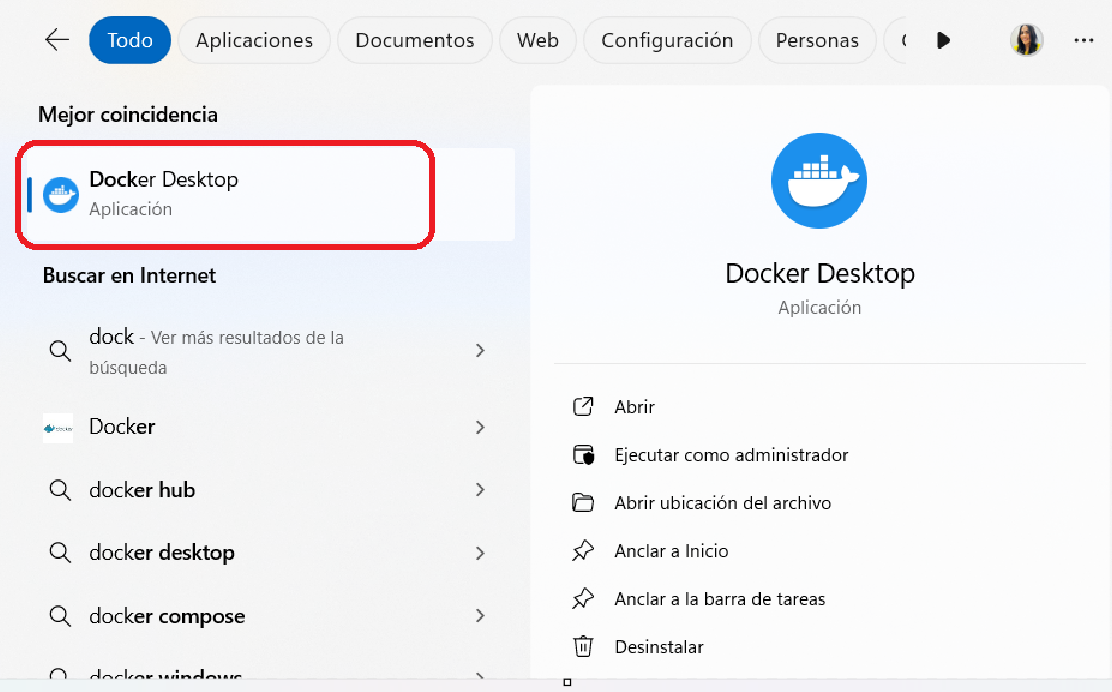

### **Paso 1: Entra y verifica que el motor principal de Docker (Docker Daemon) está activo y funcionando correctamente.**

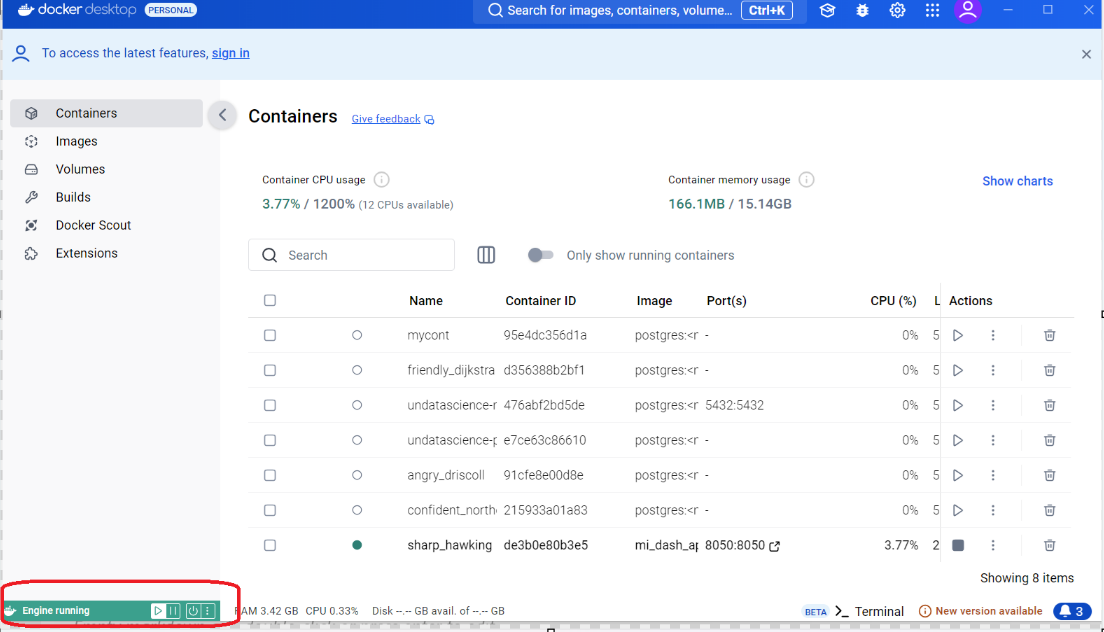

## **Paso 2: Luego crea los archivos necesarios para tu App**

## Vamos a crear una App Interactiva con Mapas usando Streamlit, Docker y Render

Este proyecto consiste en crear una aplicación web interactiva en **Streamlit** con pestañas tipo menú, un **mapa con Folium**, un **dashboard de gráficos**, y desplegarla localmente con **Docker**. Posteriormente, en la nube con **Render.com**.

##  Estructura del Proyecto

```
mi_app_docker/
├── app.py
├── Dockerfile
├── .dockerignore
├── requirements.txt
├── pages/
│   ├── 1_Mapa.py
│   └── 2_Dashboard.py
```

## **2.1: app.py**

```python
import streamlit as st
from streamlit_option_menu import option_menu

st.set_page_config(page_title="App con Mapas", layout="wide")

with st.sidebar:
    selected = option_menu("Menú", ["Inicio", "Mapa", "Dashboard"],
        icons=["house", "geo-alt", "bar-chart"], menu_icon="cast", default_index=0)

if selected == "Inicio":
    st.title("Bienvenido a la App Interactiva ")
    st.markdown("Esta app tiene mapas, dashboards y está lista para Docker .")
elif selected == "Mapa":
    st.switch_page("pages/1_Mapa.py")
elif selected == "Dashboard":
    st.switch_page("pages/2_Dashboard.py")
```

**Puedes crear una carpeta para que guardes los archivos que se visualizaran en cada pestaña**

##   **2.2: pages/1_Mapa.py**

```python
import streamlit as st
import folium
from streamlit_folium import st_folium

st.set_page_config(page_title="Mapa", layout="wide")

st.title("Mapa Interactivo con Folium")

m = folium.Map(location=[4.6097, -74.0818], zoom_start=6)

folium.Marker(
    location=[4.6097, -74.0818],
    popup="Bogotá",
    tooltip="Click para más info"
).add_to(m)

st_folium(m, width=700, height=500)
```

## **2.3: pages/2_Dashboard.py**

```python
import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt

st.set_page_config(page_title="Dashboard", layout="wide")
st.title(" Dashboard de Datos")

data = pd.DataFrame({
    "Categoría": ["A", "B", "C", "D"],
    "Valores": [23, 17, 35, 29]
})

st.dataframe(data)

fig, ax = plt.subplots()
ax.bar(data["Categoría"], data["Valores"], width=0.4)
st.pyplot(fig)
```


## **2.4: Crear un archivo que se llame Dockerfile**

##  Dockerfile

```dockerfile
FROM python:3.10-slim

ENV PYTHONDONTWRITEBYTECODE 1
ENV PYTHONUNBUFFERED 1

WORKDIR /app

COPY . .
COPY pages ./pages

RUN pip install --upgrade pip
RUN pip install -r requirements.txt

EXPOSE 8501

ENTRYPOINT ["streamlit", "run"]
CMD ["app.py", "--server.port=8501", "--server.address=0.0.0.0"]
```

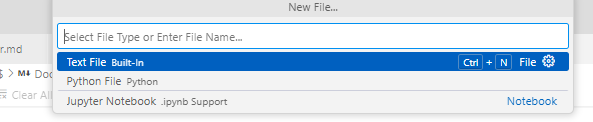

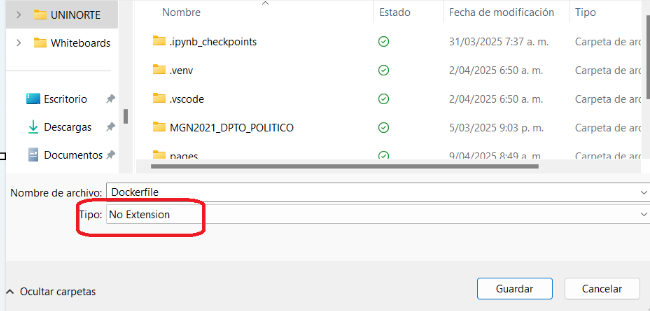

## **2.5: De igual forma crea un archivo que se llame .dockerignore** 

##  .dockerignore

```text
__pycache__/
*.pyc
*.pyo
*.pyd
.env
```

## **2.6: Crea un archivo que se llame requirements.txt** 

```text
dash
pandas
plotly
gunicorn
streamlit
streamlit-option-menu
streamlit-folium
folium
matplotlib
```

## **Paso 3: Si seguiste la estructura inicial, continua los pasos en tu terminal**

Verifica que estes trabajando en tu carpeta en donde tienes guardado losa archivos.

**Luego desde la terminal, realiza los siguientes pasos**

Verifica la version de **docker**

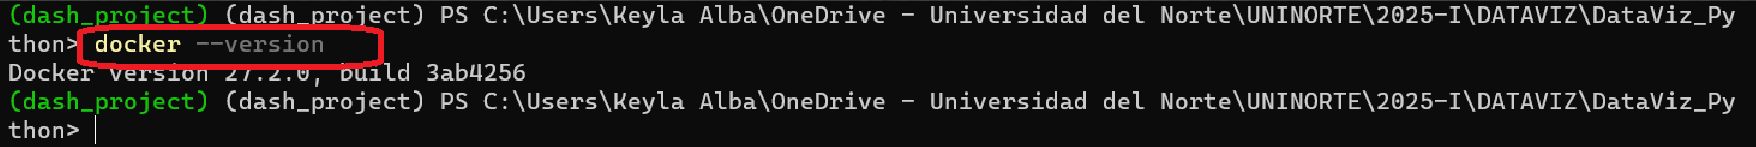

Verifica que estes trabajando en tu carpeta en donde tienes guardado losa archivos.

### **Paso 3.1: Luego desde la terminal, realiza los siguientes pasos**

`docker build -t mi-app-mapas .`


| Comando                          | Significado |
|----------------------------------|-------------|
| `docker build`                   | Le indica a Docker que construya una imagen a partir de un `Dockerfile`. |
| `-t mi-app-mapas`                | Usa `-t` (tag) para asignar el nombre `mi-app-mapas` a la imagen resultante. |
| `.` (punto al final)             | Le dice a Docker que use el contexto de construcción en la carpeta actual. |


Este comando creará una imagen local llamada **`mi-app-mapas`** que incluirá todo el código, dependencias y configuraciones especificadas en el `Dockerfile`.


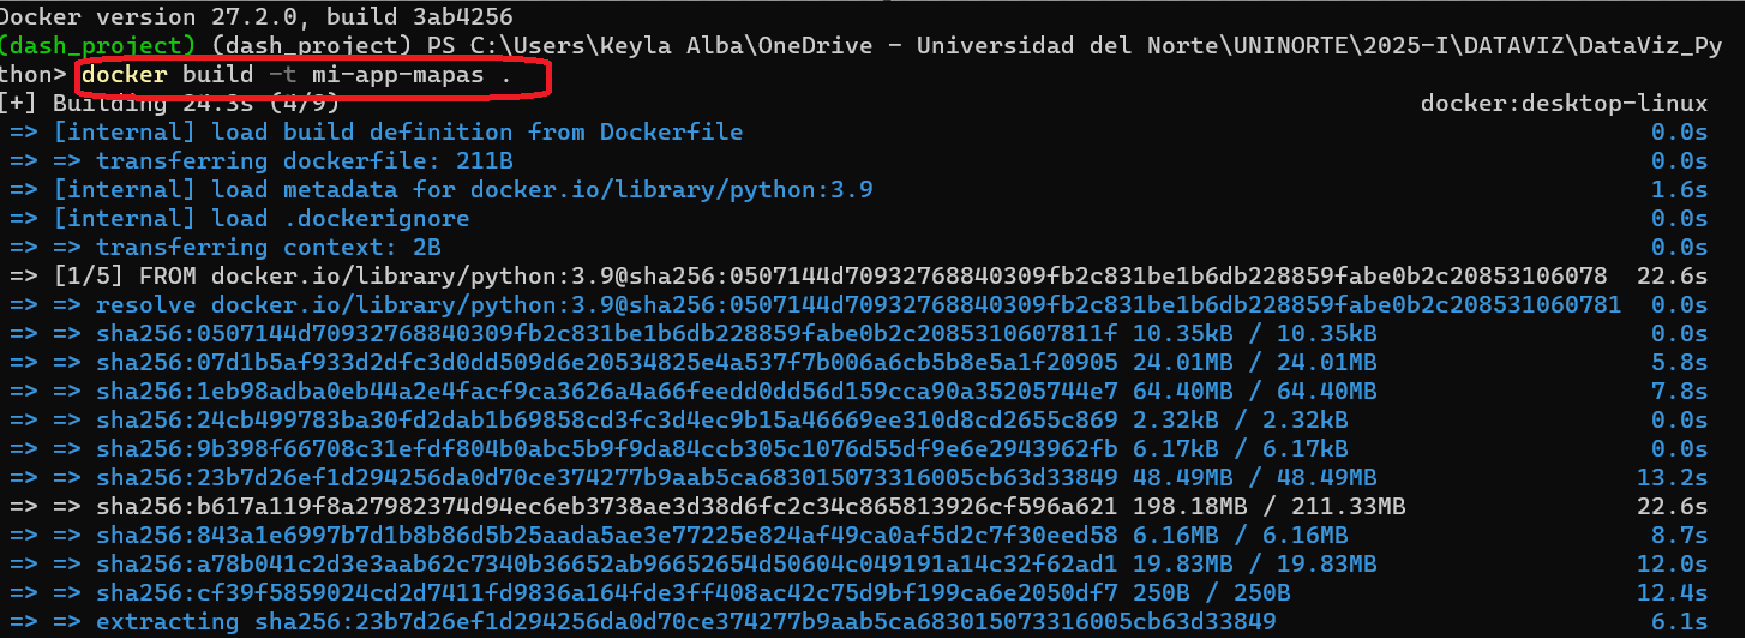

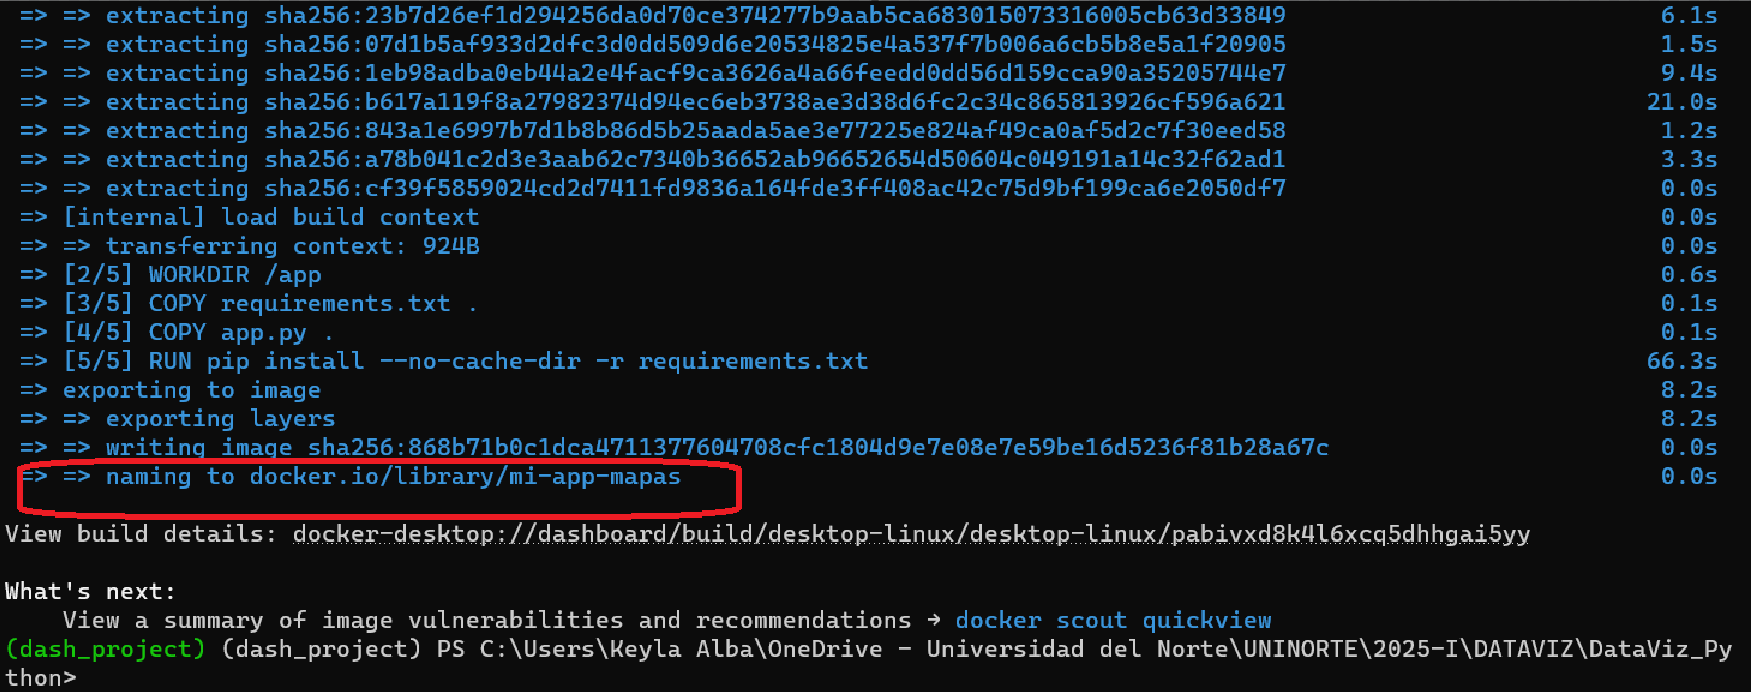

**Verificas localmente desde Docker desktop**

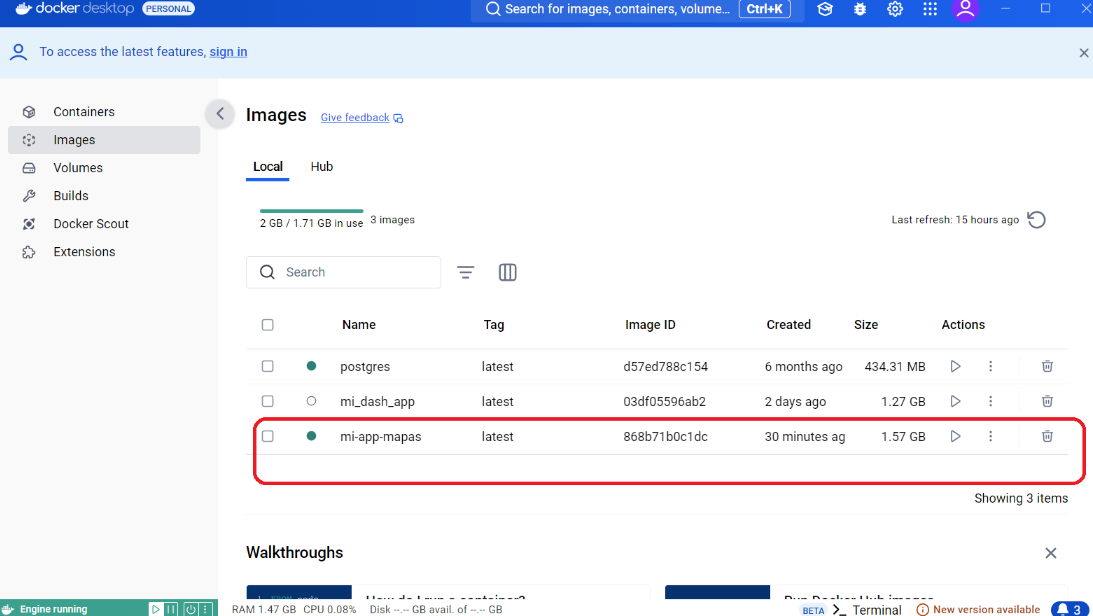

### **Paso 3.2: Ejecutar el contenedor localmente**


Una vez creada la imagen con `docker build`, ejecutamos el contenedor con el siguiente comando:

`docker run -p 8501:8501 mi-app-mapas` 

| Comando                       | Explicación |
|-------------------------------|-------------|
| `docker run`                  | Inicia un nuevo contenedor basado en una imagen. |
| `-p 8501:8501`                | Mapea el puerto 8501 del contenedor al puerto 8501 del host (tu computador), lo cual permite acceder a la app desde el navegador. |
| `mi-app-mapas`                | Es el nombre de la imagen Docker que construiste previamente. |


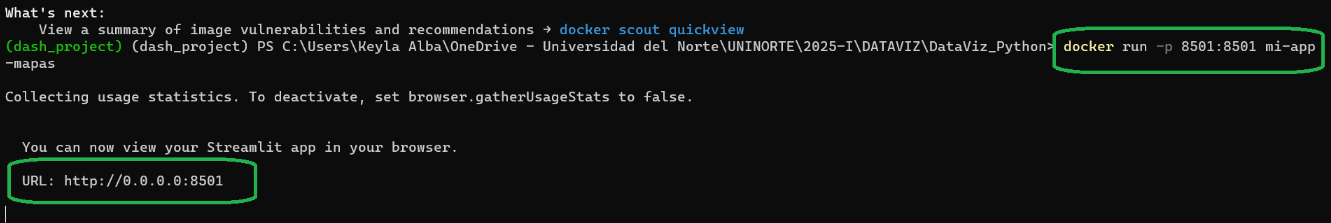

### **Paso 4: Ver la aplicación**

Abre en tu navegador:

```
http://localhost:8501
```

Deberías ver la app funcionando con:
- Un menú lateral
- Un mapa interactivo (en la pestaña Mapa)
- Un gráfico de barras (en la pestaña Dashboard)

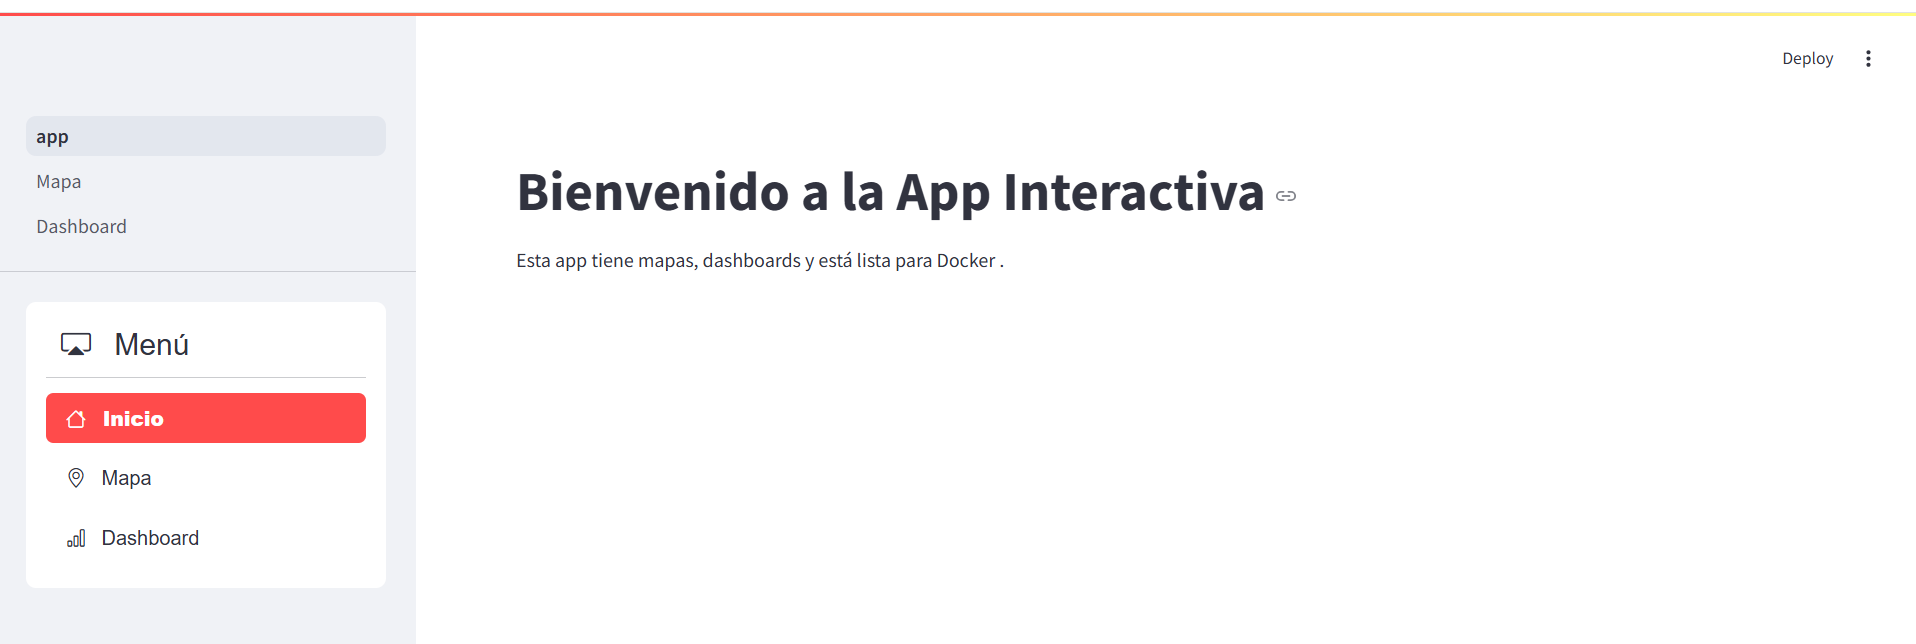

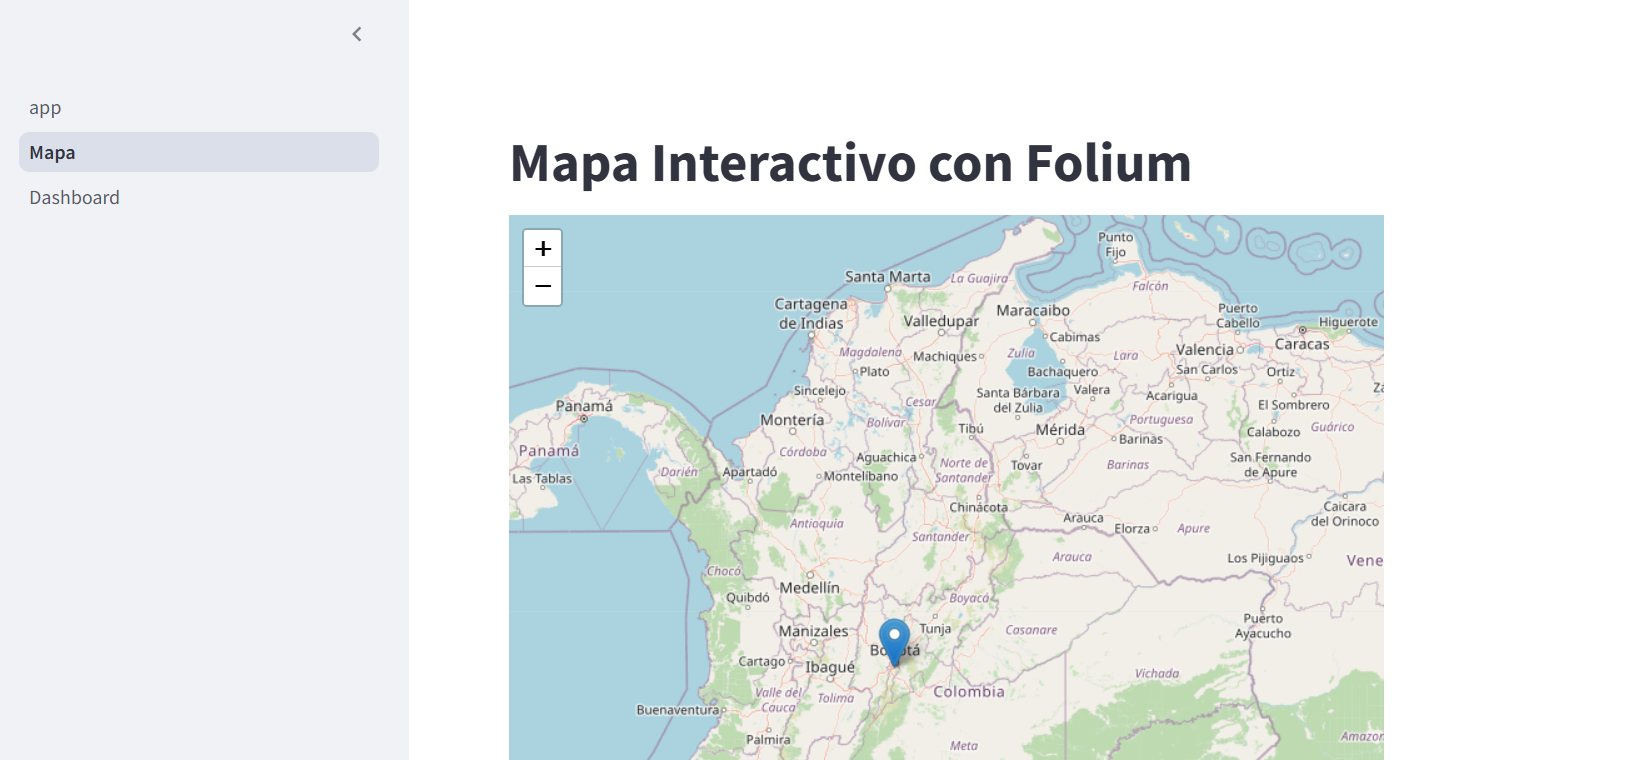

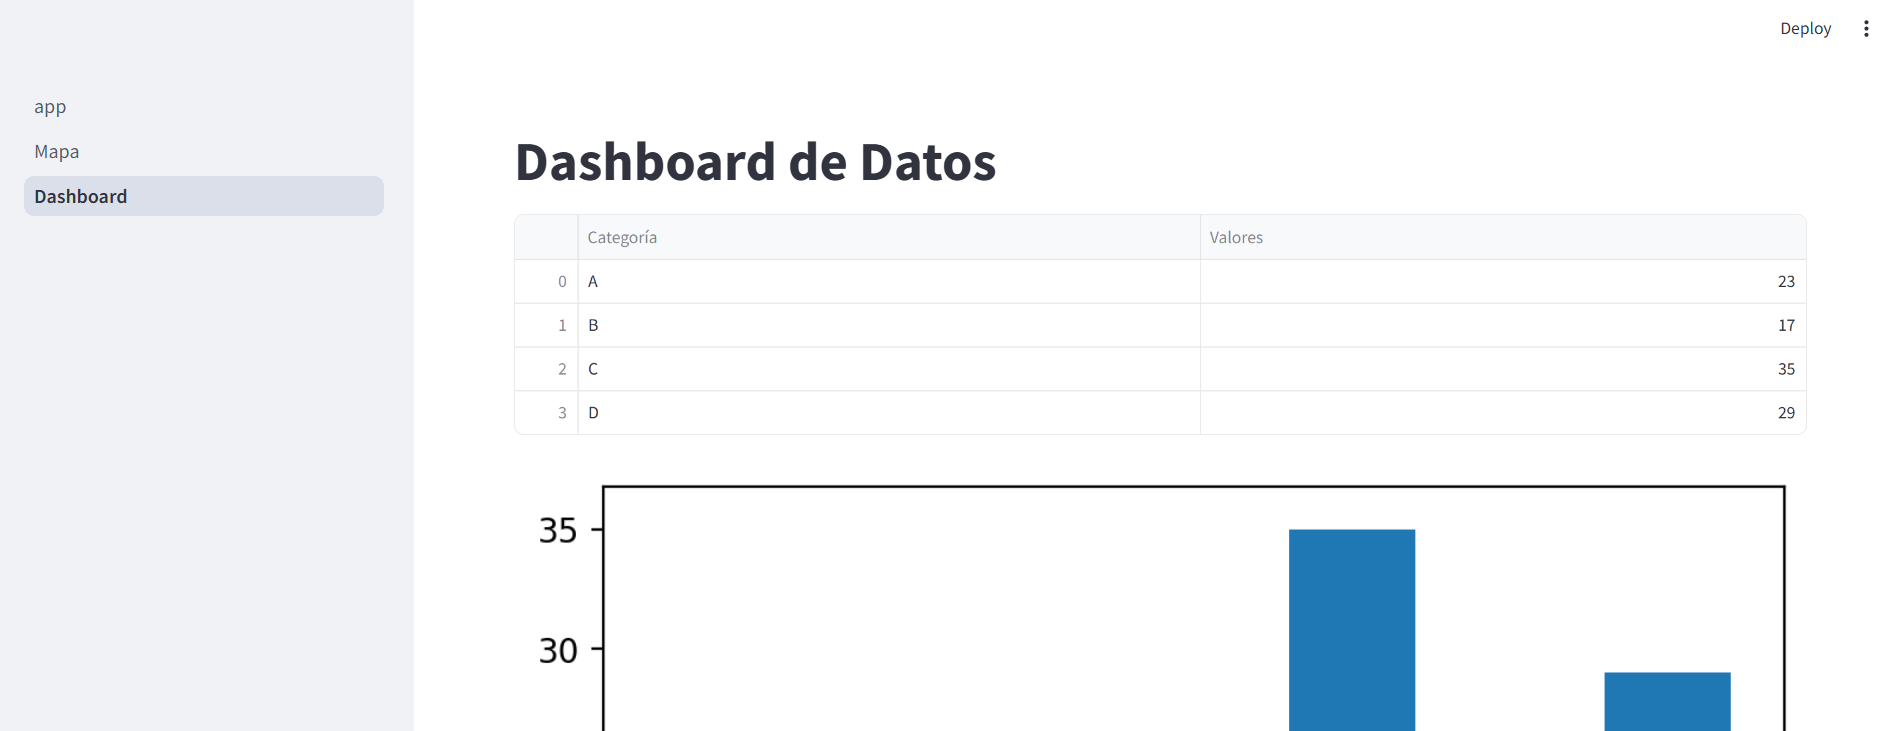

##  **Introducción al Despliegue de Docker en la Nube**

Desplegar una aplicación Docker en la nube significa llevar un contenedor que funciona localmente y hacerlo accesible desde cualquier lugar del mundo a través de Internet. Gracias a Docker, la app se empaqueta con todo lo necesario (código, dependencias, configuraciones), lo que garantiza que se ejecute de la misma manera en cualquier servidor. 

Servicios en la nube como **Render.com**, **Heroku**, **Google Cloud Run** o **AWS ECS** permiten tomar esa imagen Docker y publicarla fácilmente, sin necesidad de configurar servidores complejos. Este proceso hace posible que aplicaciones web desarrolladas con frameworks como **Streamlit** estén disponibles 24/7 para usuarios, clientes o estudiantes, desde un simple enlace web. 

En primer lugar, usaremos **Render.com** por su simplicidad y porque ofrece un plan gratuito ideal para publicar prototipos, proyectos educativos o dashboards personales con muy poco esfuerzo.


### **Requisitos para Despliegue de una App Docker en la Nube con Render**

A continuación, se describen los pasos para desplegar una aplicación Docker (como nuestra app en Streamlit) utilizando **Render.com**, una plataforma sencilla y gratuita para proyectos web y APIs.

 
- Tener una cuenta en [https://render.com](https://render.com)
- Tener tu proyecto subido a GitHub
- El proyecto debe incluir:
  - `Dockerfile`
  - `requirements.txt`
  - `app.py` y demás archivos del proyecto
  - (Opcional pero recomendado) un archivo `render.yaml`

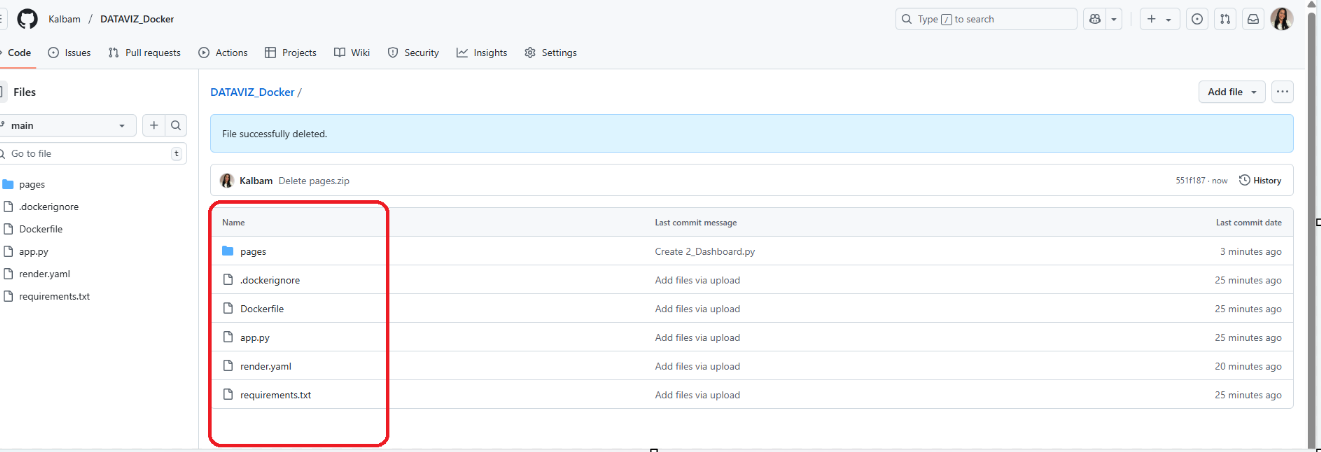

##  Archivo `render.yaml`

El archivo `render.yaml` es un archivo de configuración que permite automatizar el despliegue de una aplicación en **Render.com**. En lugar de llenar formularios manualmente en la plataforma, este archivo le indica a Render cómo debe construir y ejecutar la aplicación directamente desde el repositorio de GitHub.

---

###  Ejemplo básico de `render.yaml`

```yaml
services:
  - type: web
    name: dataviz-docker
    env: docker
    plan: free
    branch: main
    repo: https://github.com/TU_USUARIO/TU_REPO
    dockerfilePath: ./Dockerfile
    autoDeploy: true


###  **Pasos para desplegar en Render**

#### 1. Inicia sesión en [Render.com](https://render.com) y ve a **Dashboard**
   - Si es tu primera vez, regístrate con tu cuenta de GitHub para conectar ambos servicios.

#### 2. Haz clic en el botón **“New +”** y selecciona **Web Service**

#### 3. Elige tu repositorio de GitHub que contiene tu app con Docker

#### 4. Render detectará automáticamente tu archivo `Dockerfile`
   - Si tienes un archivo `render.yaml`, también lo usará para configurar automáticamente el despliegue.

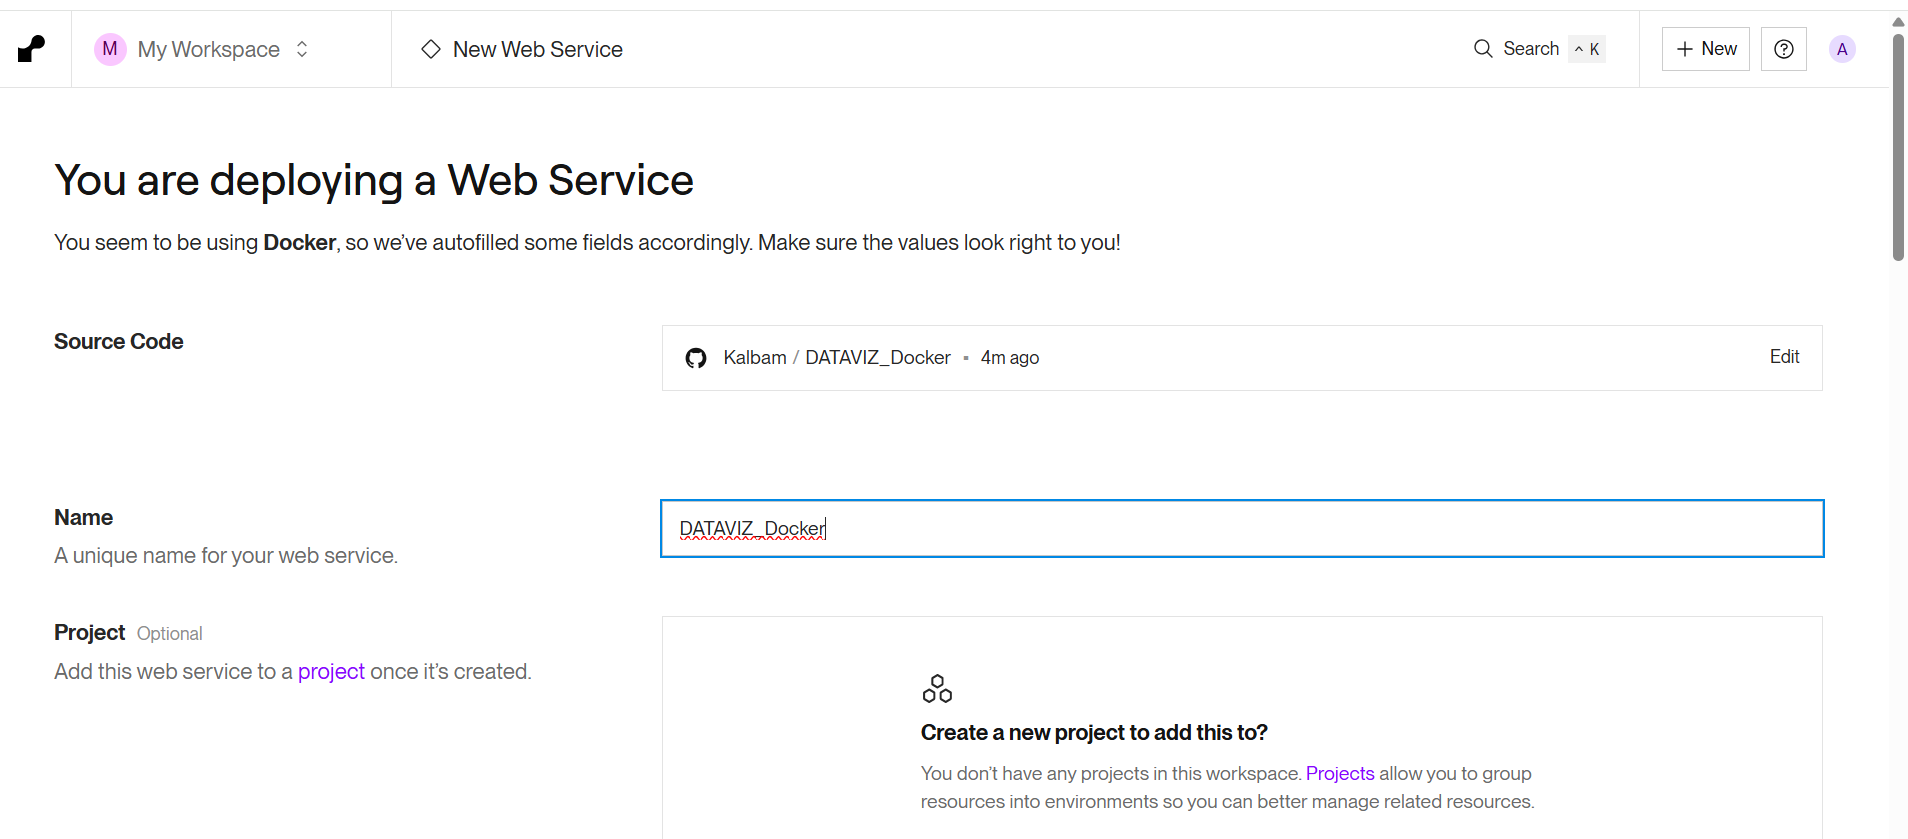


### **Configuración inicial del servicio**

Una vez selecciones tu repositorio en [https://render.com](https://render.com), verás un formulario como el de la imagen. Rellena los campos así:

| Campo             | Valor recomendado                                      |
|------------------|---------------------------------------------------------|
| **Language**      | `Docker`                                                |
| **Branch**        | `main`                                                  |
| **Region**        | `Oregon (US West)` (o la región más cercana)            |
| **Root Directory**| Deja este campo vacío si tus archivos están en la raíz  |


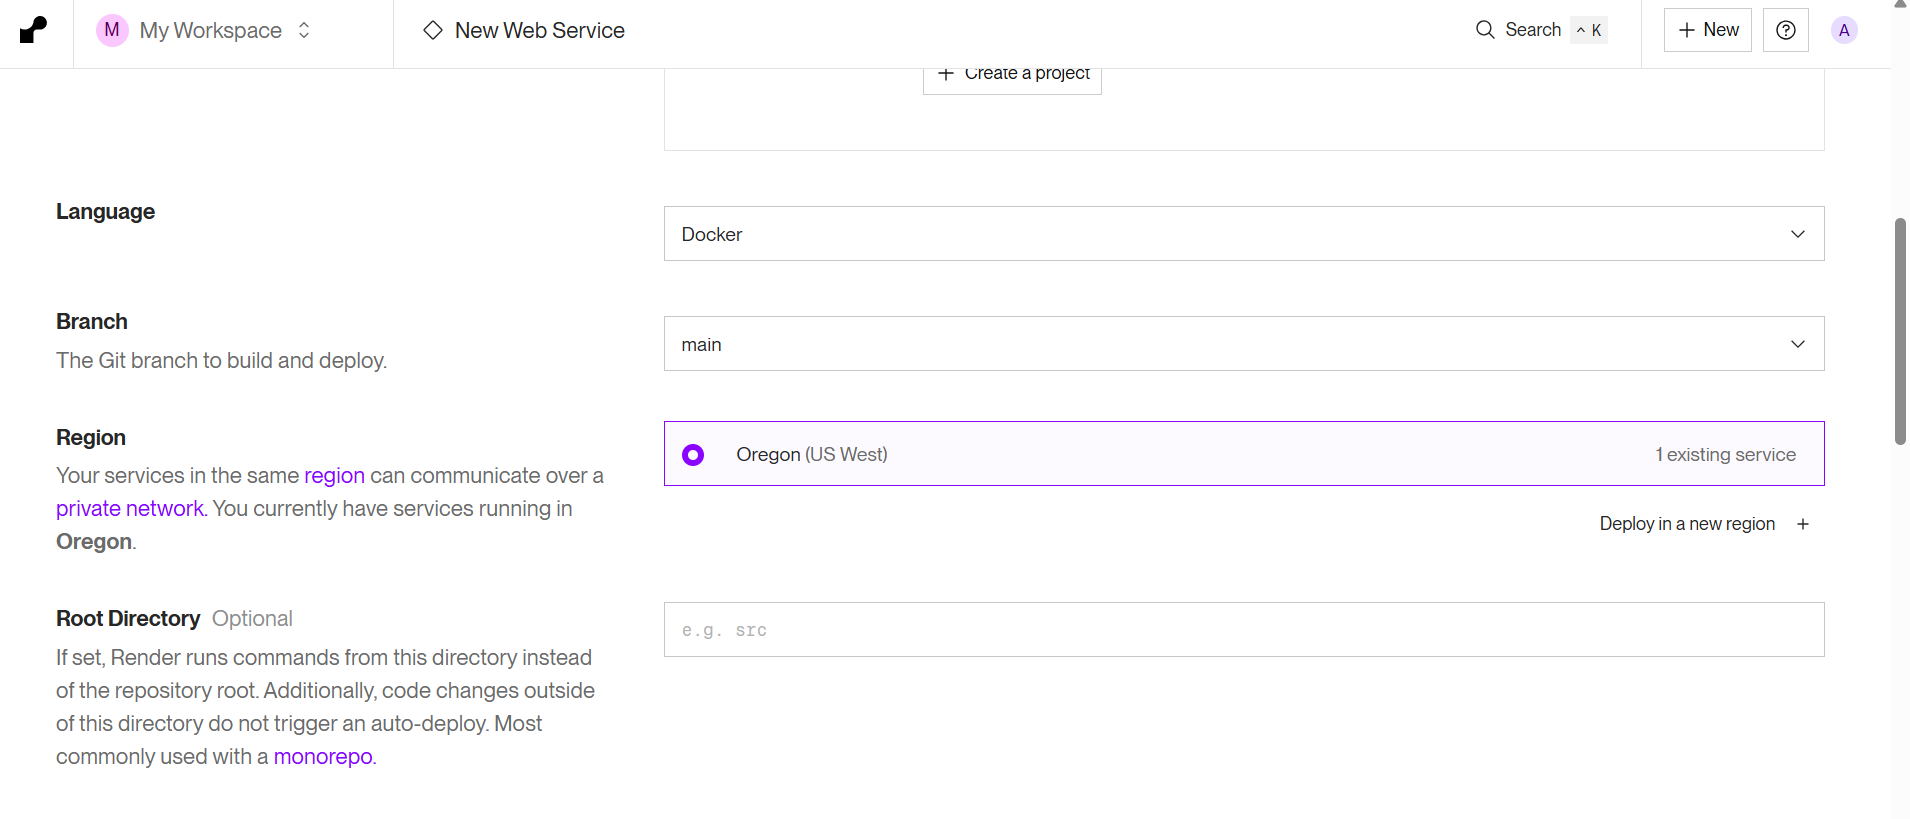

###  **Resultado**

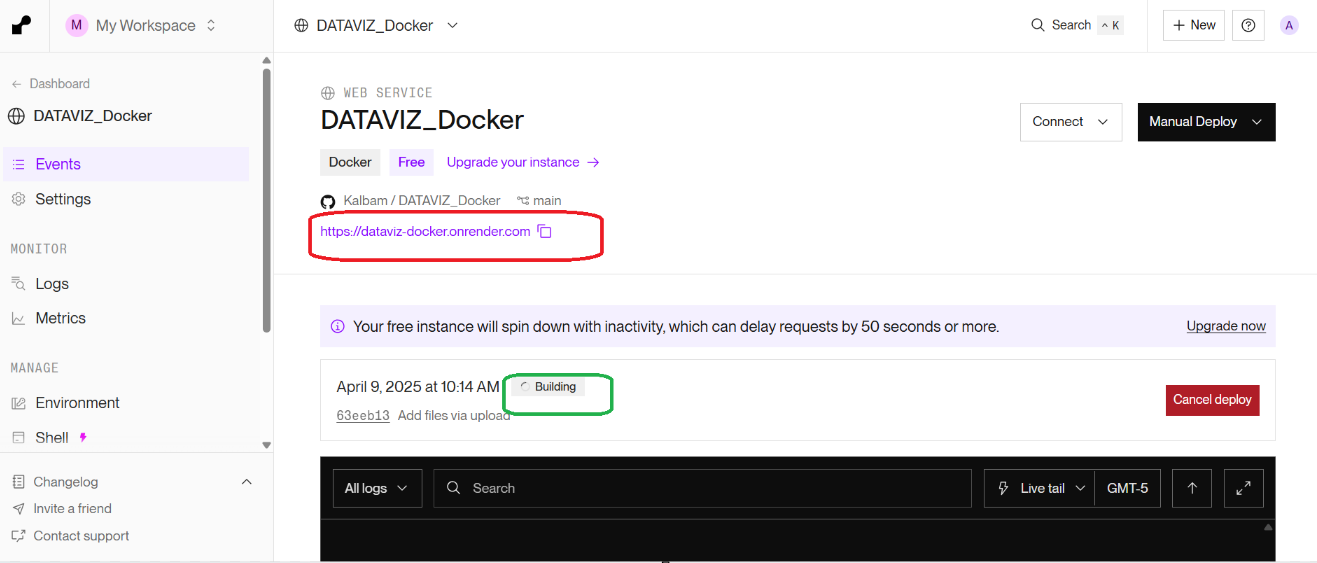

Cuando el proceso finalice correctamente, Render te mostrará una URL como:

```
https://nombre-de-tu-app.onrender.com
```

Desde esa URL podrás acceder a tu aplicación en la nube.

**Nota**: Cada vez que hagas cambios en tu código y los subas a GitHub (con `git push`), Render volverá a construir la imagen si tienes activado el auto-deploy.


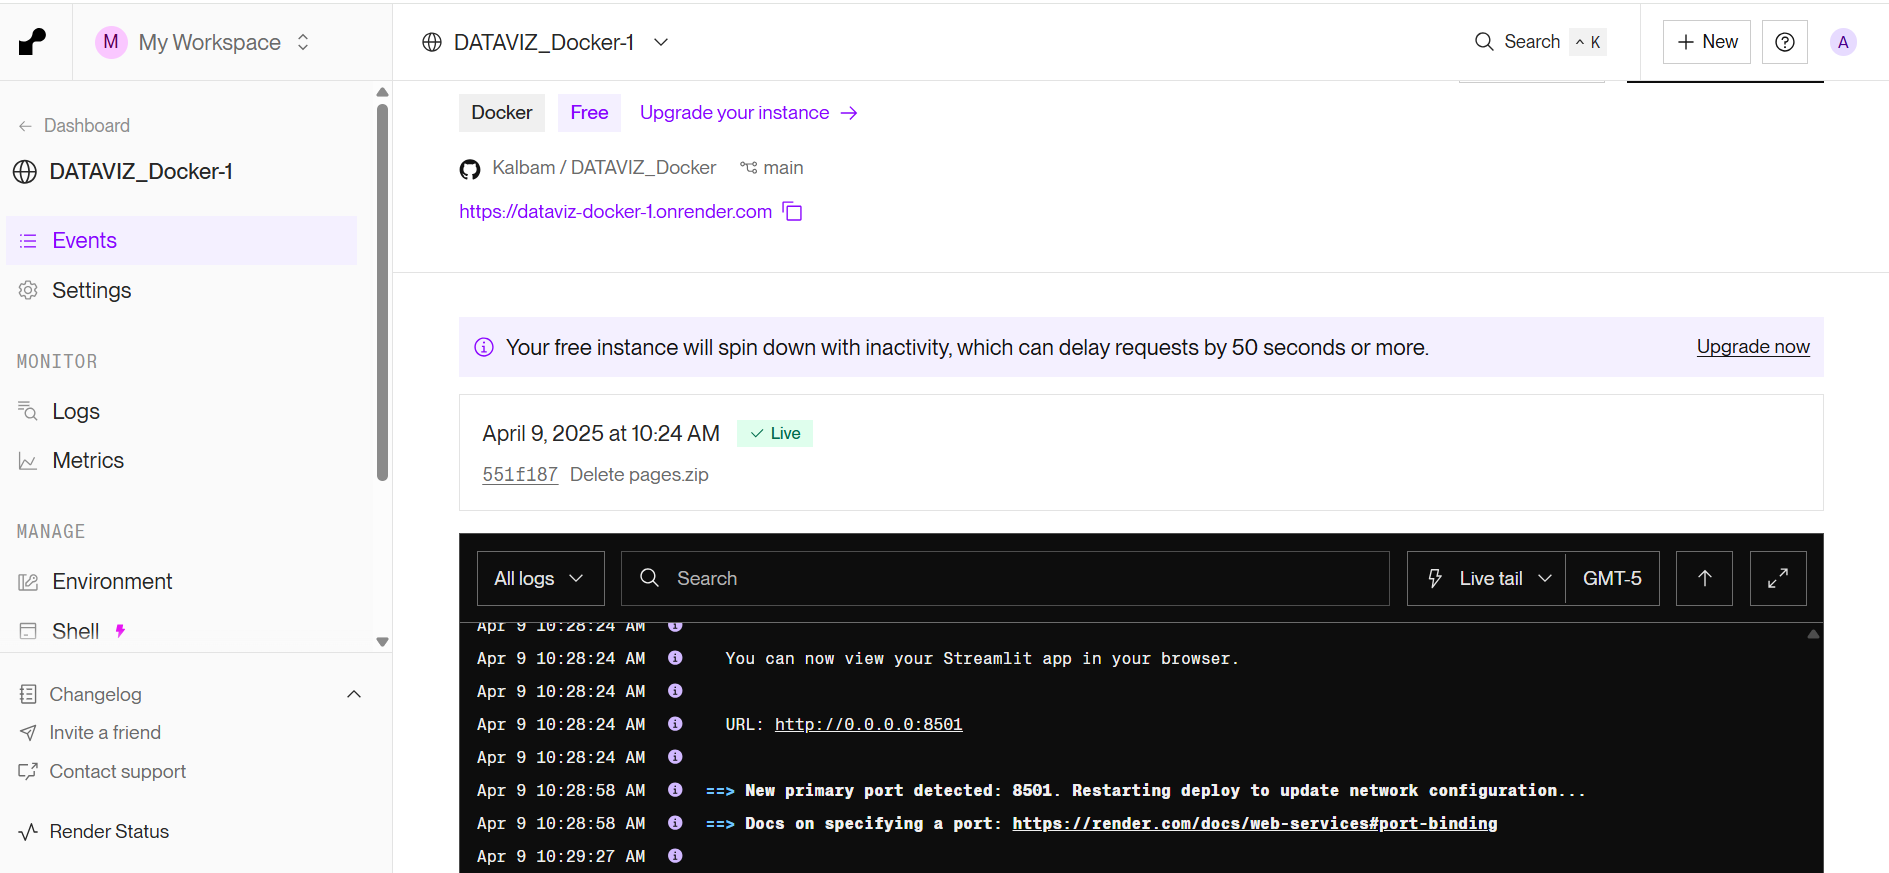

##  Opciones de Almacenamiento Externo para Datos Pesados en Proyectos en la Nube

Cuando tu dataset es muy grande (más de 100 MB o millones de registros), lo mejor es guardarlo fuera del repositorio de GitHub. Aquí tienes las mejores opciones:



###  Tabla comparativa de almacenamiento externo

| Plataforma           | Tipo                | Ideal para...                         | ¿Acceso público? | ¿Código necesario? | Notas clave                                         |
|----------------------|---------------------|----------------------------------------|------------------|--------------------|-----------------------------------------------------|
| **Google Drive**     | Nube personal        | CSV, Excel, imágenes                   |  (si compartes) | Sí (`gdown`, link) | Rápido y gratis. Cuidado con links largos.          |
| **Dropbox**          | Nube personal        | CSV, ZIP, imágenes                     |  (si compartes) | Sí (`wget`, `requests`) | Fácil de integrar vía enlace.                        |
| **Amazon S3**        | Nube profesional     | Grandes volúmenes de datos             | / (configurable) | Sí (`boto3`)        | Alta escalabilidad, necesitas una cuenta AWS.       |
| **Google Cloud Storage (GCS)** | Nube profesional | Archivos tipo Big Data (Parquet, Avro) |  Solo autorizado | Sí (`gcsfs`, `google-cloud-storage`) | Ideal para producción, requiere cuenta GCP.         |
| **Kaggle Datasets**  | Repositorio de datos | Datos listos para ciencia de datos     |  Sí             | Sí (`kaggle` API)   | Muy útil si tus datos son públicos y educativos.    |
| **Git LFS**          | GitHub (Large Files) | Datos grandes dentro de GitHub         |  Privado o público | No extra (usa Git) | Tiene límite de almacenamiento gratuito (~1 GB).   |
| **Bases SQL remotas**| PostgreSQL, MySQL    | Datos en tablas relacionales           |  Autenticado    | Sí (`psycopg2`, `sqlalchemy`) | Lo mejor si haces dashboards o visualización dinámica. |

---

###  Recomendación según el caso

| Caso                                                        | Mejor opción             |
|-------------------------------------------------------------|--------------------------|
| Dataset educativo (menos de 500 MB)                         | Google Drive o Dropbox   |
| Dataset grande para producción (> 1 GB)                     | Amazon S3 o GCS          |
| Quieres usar consultas SQL o filtrar antes de traer datos  | PostgreSQL remoto        |
| Tienes un dataset público para compartir                   | Kaggle o Drive compartido|

---

###  Ejemplo rápido: Cargar desde Google Drive

```python
import pandas as pd

file_id = "1AbCdEfG123456XYZ"
url = f"https://drive.google.com/uc?id={file_id}"
df = pd.read_csv(url)


#  **Taller** 
**Desarrollo y Despliegue de un Dashboard Interactivo con Streamlit y Docker**


Diseñar y desplegar una aplicación web interactiva usando **Streamlit**, que visualice y analice una base de datos temática. La app debe incluir al menos **3 visualizaciones** relevantes y ser desplegada en línea usando **Docker** y **Render.com**.


##  Bases de datos disponibles

Se proporcionan **18 bases de datos** con contextos variados (salud, finanzas, energía, turismo, etc.) en formato `.csv`, todas incluyen una columna de `Departamento`, `Latitud` y `Longitud` para visualizaciones geográficas.

 Repositorio de datos:  
 https://github.com/Kalbam/Datos_DATAVIZ


##  Requisitos mínimos del proyecto

### 1. Estructura de la app (en Python con Streamlit):
- Uso de `st.sidebar` o `option_menu` para navegación
- Mínimo **3 páginas/pestañas** con:
  - Contexto de datos (imagen alusiva etc.)
  - Análisis descriptivo y Visualización de datos (tabla, gráfico, mapa, media, conteo, etc.)
  - Georrferenciación de variable de interes por departamentos. Uso de mapas interactivos con `folium`
         Uso de filtros dinámicos (`st.selectbox`, `st.slider`, etc.)
        Interacción entre visualizaciones (ej: clic en mapa → actualiza tabla)
  
- Al menos un gráfico usando `matplotlib`, `plotly` o `folium`
- Lectura de la base de datos usando `pandas`

### 2. Dockerización:
- Crear un archivo `Dockerfile` funcional
- Agregar `requirements.txt` y `.dockerignore`
- Probar localmente: `docker build` y `docker run`

### 3. Despliegue en Render.com:
- Subir el proyecto a GitHub
- Crear un `render.yaml` (opcional pero recomendado)
- **Desplegar desde Render y entregar el enlace público en la carpeta que se llama Adjuntar enlace con plazo mañana 10 de abril a las 2:00 pm**


## Entregables

- Enlace público de la app desplegada en Render
- Enlace al repositorio de GitHub con el proyecto completo
- Evidencia de prueba local (captura de Docker corriendo)

